In [19]:
import pandas as pd
from finta import TA
import numpy as np
from pathlib import Path

In [20]:
#yahoo finance stock data (for longer timeframe)
import yfinance as yf

def stock_df(ticker, start, end):
    stock = yf.Ticker(ticker)
    stock_df = stock.history(start = start, end = end)
    return stock_df

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('today')
                     
spy_df = stock_df('SPY', start, end)

len(spy_df)

1771

In [21]:
# spy_df["Monetary Gain"] = spy_df["Close"].diff()
spy_df['Actual Return'] = spy_df["Close"].pct_change()

spy_df.loc[(spy_df['Actual Return']*100 > 1), 'Return Direction'] = 1
spy_df.loc[(spy_df['Actual Return']*100  < 1), 'Return Direction'] = 0
spy_df.loc[(spy_df['Actual Return']*100 < 0), "Return Direction"] = -1

# spy_df['Trades'] = np.abs(spy_df['Trading Signal'].diff())

# spy_df['Strategy Returns'] = spy_df['Actual Return'] * spy_df['Trading Signal'].shift()

spy_df.dropna(inplace= True)

spy_df.tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Return,Return Direction
Date,,,,,,,,,
2021-12-15,461.797598,469.211523,459.126957,468.952454,116899300,0.000,0,0.015625,1.0
2021-12-16,470.915555,471.214493,463.172738,464.816986,116568600,0.000,0,-0.008819,-1.0
2021-12-17,461.549988,464.739990,458.059998,459.869995,135511600,1.633,0,-0.010643,-1.0
2021-12-20,454.480011,455.399994,451.140015,454.980011,107134800,0.000,0,-0.010633,-1.0
2021-12-21,458.609985,463.209991,456.309998,463.059998,69806300,0.000,0,0.017759,1.0
2021-12-22,462.790009,467.809998,462.579987,467.690002,58890200,0.000,0,0.009999,0.0
2021-12-23,468.750000,472.190002,468.640015,470.600006,56439700,0.000,0,0.006222,0.0
2021-12-27,472.059998,477.309998,472.010010,477.260010,56808600,0.000,0,0.014152,1.0
2021-12-28,477.720001,478.809998,476.059998,476.869995,47274600,0.000,0,-0.000817,-1.0


In [22]:
#per trade commision cost: 2% of total 
#ex.) if you bought 100 shares at 1/10/22 for a total of $46,270, there is $925.4 commision.
#Then you sell again at 1/11/21 for $46,523 , you make a profit of $253. But considering commision, you lose a lot more money

In [23]:
#Adding Technical indicators

spy_technical_indicators = pd.DataFrame()

spy_technical_indicators["Close"] = spy_df["Close"]
spy_technical_indicators["Actual Return"] = spy_df["Actual Return"]



#Creating Volume Weighted Average Price 'VWAP'  -- Trend Indicator
spy_technical_indicators['VWAP'] = TA.VWAP(spy_df)
spy_technical_indicators["VWAP Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["VWAP"] < spy_technical_indicators["Close"], 'VWAP Evaluation'] = "Sell"
spy_technical_indicators.loc[spy_technical_indicators["VWAP"] > spy_technical_indicators["Close"], 'VWAP Evaluation'] = "Buy"

spy_technical_indicators["VWAP Lag"] = spy_technical_indicators["VWAP Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "VWAP Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "VWAP Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "VWAP Evaluation"] = "VWAP Bearish Signal"
    if (spy_technical_indicators.loc[index, "VWAP Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "VWAP Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "VWAP Evaluation"] = "VWAP Buillish Signal"

spy_technical_indicators.drop(columns = ["VWAP Lag"], inplace = True)



#Creating Exponential Moving Average 'EMA' short(9-days) and long(70-days) for DMAC trading algorithm -- Trend Indicator
spy_technical_indicators['EMA_short'] = TA.EMA(spy_df, 9)
spy_technical_indicators['EMA_long'] = TA.EMA(spy_df, 70)
spy_technical_indicators["DMAC Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["EMA_short"] < spy_technical_indicators["EMA_long"], 'DMAC Evaluation'] = "Sell"
spy_technical_indicators.loc[spy_technical_indicators["EMA_short"] > spy_technical_indicators["EMA_long"], 'DMAC Evaluation'] = "Buy"

spy_technical_indicators["DMAC Lag"] = spy_technical_indicators["DMAC Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "DMAC Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "DMAC Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "DMAC Evaluation"] = "DMAC Bearish Signal"
    if (spy_technical_indicators.loc[index, "DMAC Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "DMAC Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "DMAC Evaluation"] = "DMAC Buillish Signal"

spy_technical_indicators.drop(columns = ["DMAC Lag"], inplace = True)



#Creating Bollinger Bands 'BBANDS'  -- Volatility Indicator
bbands_df = TA.BBANDS(spy_df)
spy_technical_indicators = pd.concat([spy_technical_indicators, bbands_df], axis=1)
spy_technical_indicators["BBbands Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["BB_UPPER"] < spy_technical_indicators["Close"], 'BBbands Evaluation'] = "Sell"
spy_technical_indicators.loc[spy_technical_indicators["BB_LOWER"] > spy_technical_indicators["Close"], 'BBbands Evaluation'] = "Buy"

spy_technical_indicators["BBbands Lag"] = spy_technical_indicators["BBbands Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "BBbands Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "BBbands Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "BBbands Evaluation"] = "BBbands Bearish Signal"
    if (spy_technical_indicators.loc[index, "BBbands Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "BBbands Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "BBbands Evaluation"] = "BBbands Buillish Signal"

spy_technical_indicators.drop(columns = ["BBbands Lag"], inplace = True)



#Creating Elder's Force Index 'EFI'  -- Volatility Indicator
spy_technical_indicators['EFI'] = TA.EFI(spy_df)
spy_technical_indicators["EFI Evaluation"] = "Hold"
spy_technical_indicators.loc[spy_technical_indicators["EFI"] < 0, 'EFI Evaluation'] = "Buy"
spy_technical_indicators.loc[spy_technical_indicators["EFI"] > 0, 'EFI Evaluation'] = "Sell"

spy_technical_indicators["EFI Lag"] = spy_technical_indicators["EFI Evaluation"].shift(1)

for index, row in spy_technical_indicators.iterrows():
    if (spy_technical_indicators.loc[index, "EFI Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "EFI Lag"] == "Sell"):
            spy_technical_indicators.loc[index, "EFI Evaluation"] = "EFI Bearish Signal"
    if (spy_technical_indicators.loc[index, "EFI Evaluation"] == "Hold" and spy_technical_indicators.loc[index, "EFI Lag"] == "Buy"):
            spy_technical_indicators.loc[index, "EFI Evaluation"] = "EFI Buillish Signal"

spy_technical_indicators.drop(columns = ["EFI Lag"], inplace = True)
spy_technical_indicators.drop(columns = ["Close"], inplace = True)
spy_technical_indicators.dropna(inplace=True)


display(spy_technical_indicators.head(10))
display(spy_technical_indicators.tail(10))

,Actual Return,VWAP,VWAP Evaluation,EMA_short,EMA_long,DMAC Evaluation,BB_UPPER,BB_MIDDLE,BB_LOWER,BBbands Evaluation,EFI,EFI Evaluation
Date,,,,,,,,,,,,
2015-02-02,0.012384,177.454240,Buy,177.330483,177.673934,Sell,181.333020,177.688833,174.044646,Hold,-9.392207e+06,Buy
2015-02-03,0.014461,177.517406,Sell,177.833966,177.808205,Buy,181.578771,177.825780,174.072790,Hold,3.968451e+07,Sell
2015-02-04,-0.003807,177.588649,Sell,178.097114,177.888594,Buy,181.628793,178.011892,174.394991,Hold,2.010982e+07,Sell
2015-02-05,0.010095,177.671170,Sell,178.670750,178.067527,Buy,182.018980,178.179126,174.339272,Hold,4.332348e+07,Sell
2015-02-06,-0.002765,177.775817,Sell,179.027893,178.202641,Buy,181.962464,178.163765,174.365066,Hold,2.770102e+07,Sell
2015-02-09,-0.004476,177.822172,Sell,179.150855,178.281978,Buy,182.003136,178.180447,174.357759,Hold,1.332500e+07,Sell
2015-02-10,0.010653,177.901249,Sell,179.632962,178.457789,Buy,182.468210,178.363046,174.257881,Hold,3.823990e+07,Sell
2015-02-11,0.000580,177.983341,Sell,180.039246,178.625527,Buy,182.906599,178.575931,174.245263,Hold,3.407236e+07,Sell
2015-02-12,0.009617,178.099865,Sell,180.713995,178.870080,Buy,183.628535,178.929715,174.230895,Hold,5.385762e+07,Sell


,Actual Return,VWAP,VWAP Evaluation,EMA_short,EMA_long,DMAC Evaluation,BB_UPPER,BB_MIDDLE,BB_LOWER,BBbands Evaluation,EFI,EFI Evaluation
Date,,,,,,,,,,,,
2021-12-30,-0.002765,254.571599,Sell,471.867232,457.534793,Buy,481.084370,465.877753,450.671135,Hold,3.626010e+07,Sell
2021-12-31,-0.002520,254.661008,Sell,472.485784,458.025643,Buy,481.780892,466.835818,451.890745,Hold,1.990103e+07,Sell
2022-01-03,0.005790,254.760996,Sell,473.530626,458.580132,Buy,482.051323,468.129687,454.208052,Hold,4.560624e+07,Sell
2022-01-04,-0.000335,254.859392,Sell,474.334498,459.114494,Buy,482.672224,469.147997,455.623769,Hold,3.746409e+07,Sell
2022-01-05,-0.019202,254.999758,Sell,473.143599,459.375494,Buy,482.713597,469.234967,455.756337,Hold,-1.048336e+08,Buy
2022-01-06,-0.000939,255.114373,Sell,472.102880,459.616748,Buy,482.715462,469.238156,455.760850,Hold,-9.531713e+07,Buy
2022-01-07,-0.003954,255.225756,Sell,470.900303,459.799093,Buy,482.700883,469.306789,455.912694,Hold,-1.041819e+08,Buy
2022-01-10,-0.001244,255.378873,Sell,469.822245,459.959964,Buy,482.629242,469.127692,455.626142,Hold,-9.918852e+07,Buy
2022-01-11,0.009108,255.476188,Sell,469.807796,460.235740,Buy,482.726189,469.368362,456.010536,Hold,-4.001239e+07,Buy


In [24]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

categorical_variables = list(spy_technical_indicators.dtypes[spy_technical_indicators.dtypes == "object"].index)

categorical_variables
enc = OneHotEncoder(sparse= False)
encoded_data = enc.fit_transform(spy_technical_indicators[categorical_variables])

encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables), index = spy_technical_indicators.index)

encoded_df = pd.concat([encoded_df, spy_technical_indicators.drop(columns = categorical_variables)], axis = 1)
encoded_df

,VWAP Evaluation_Buy,VWAP Evaluation_Sell,DMAC Evaluation_Buy,DMAC Evaluation_Sell,BBbands Evaluation_BBbands Bearish Signal,BBbands Evaluation_BBbands Buillish Signal,BBbands Evaluation_Buy,BBbands Evaluation_Hold,BBbands Evaluation_Sell,EFI Evaluation_Buy,EFI Evaluation_Sell,Actual Return,VWAP,EMA_short,EMA_long,BB_UPPER,BB_MIDDLE,BB_LOWER,EFI
Date,,,,,,,,,,,,,,,,,,,
2015-02-02,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.012384,177.454240,177.330483,177.673934,181.333020,177.688833,174.044646,-9.392207e+06
2015-02-03,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.014461,177.517406,177.833966,177.808205,181.578771,177.825780,174.072790,3.968451e+07
2015-02-04,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.003807,177.588649,178.097114,177.888594,181.628793,178.011892,174.394991,2.010982e+07
2015-02-05,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.010095,177.671170,178.670750,178.067527,182.018980,178.179126,174.339272,4.332348e+07
2015-02-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.002765,177.775817,179.027893,178.202641,181.962464,178.163765,174.365066,2.770102e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.000939,255.114373,472.102880,459.616748,482.715462,469.238156,455.760850,-9.531713e+07
2022-01-07,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.003954,255.225756,470.900303,459.799093,482.700883,469.306789,455.912694,-1.041819e+08
2022-01-10,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.001244,255.378873,469.822245,459.959964,482.629242,469.127692,455.626142,-9.918852e+07


In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = encoded_df.drop(columns = ["Actual Return"])
y = encoded_df["Actual Return"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
neural = Sequential()

number_input_features = len(X.columns)
hidden_nodes_layer1 =  (number_input_features + 1) // 2 
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2
hidden_nodes_layer3 = (hidden_nodes_layer2 + 1) // 2

neural.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer2, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer3, activation="elu"))
neural.add(Dense(units=1, activation="linear"))

neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 9)                 171       
                                                                 
 dense_5 (Dense)             (None, 5)                 50        
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [27]:
# opt = tf.keras.optimizers.SGD(lr=0.01)
neural.compile(loss = "mse", optimizer = "adam",  metrics = ["mse"])

model = neural.fit(X_train_scaled, y_train, epochs = 500)

Epoch 1/500
42/42 [==============================] - 0s 827us/step - loss: 0.3245 - mse: 0.3245
Epoch 2/500
42/42 [==============================] - 0s 705us/step - loss: 0.1211 - mse: 0.1211
Epoch 3/500
42/42 [==============================] - 0s 754us/step - loss: 0.0534 - mse: 0.0534
Epoch 4/500
42/42 [==============================] - 0s 876us/step - loss: 0.0257 - mse: 0.0257
Epoch 5/500
42/42 [==============================] - 0s 778us/step - loss: 0.0146 - mse: 0.0146
Epoch 6/500
42/42 [==============================] - 0s 876us/step - loss: 0.0102 - mse: 0.0102
Epoch 7/500
42/42 [==============================] - 0s 803us/step - loss: 0.0080 - mse: 0.0080
Epoch 8/500
42/42 [==============================] - 0s 730us/step - loss: 0.0066 - mse: 0.0066
Epoch 9/500
42/42 [==============================] - 0s 778us/step - loss: 0.0056 - mse: 0.0056
Epoch 10/500
42/42 [==============================] - 0s 681us/step - loss: 0.0048 - mse: 0.0048
Epoch 11/500
42/42 [===================

In [28]:
# Y_prediction = (neural.predict(X_train_scaled) > 0.5).astype("int32")
Y_prediction = neural.predict(X_train_scaled)
Y_prediction = Y_prediction.squeeze()

results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})
display(results)

model_loss, model_accuracy = neural.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

,Predictions,Actual
Date,,
2020-10-21,0.001056,-0.001893
2017-11-20,-0.000255,0.001706
2015-07-10,-0.002024,0.012591
2020-11-25,0.006258,-0.001542
2017-04-21,-0.001696,-0.003187
...,...,...
2017-12-01,0.004531,-0.002075
2018-09-05,0.000284,-0.002691
2019-06-11,0.005726,-0.000242


42/42 - 0s - loss: 5.9773e-05 - mse: 5.9773e-05 - 156ms/epoch - 4ms/step
Loss: 5.977341425023042e-05, MSE: 5.977341425023042e-05


In [29]:
#For binary classification only
# Y_test_prediction = (neural.predict(X_test_scaled) > 0.5).astype("int32")

Y_test_prediction = neural.predict(X_test_scaled)
Y_test_prediction = Y_test_prediction.squeeze()

test_results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})

model_loss, model_accuracy = neural.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")


14/14 - 0s - loss: 6.4541e-05 - mse: 6.4541e-05 - 20ms/epoch - 1ms/step
Loss: 6.454120011767372e-05, MSE: 6.454120011767372e-05


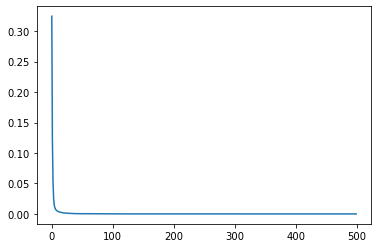

In [30]:
import matplotlib.pyplot as plt

plt.plot(model.history["loss"])

In [31]:
neural.save(Path("Files/Volatility_Indicators.h5"))

<AxesSubplot:xlabel='Date'>

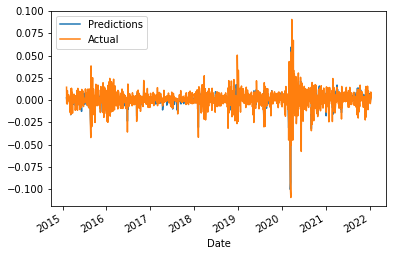

In [32]:
test_results.plot()

,RSI,CCI,ROC,STO,Returns
Date,,,,,
2015-02-03,56.060242,76.640013,1.546673,83.095018,0.014461
2015-02-04,53.981685,73.792484,2.121896,73.809416,-0.003808
2015-02-05,58.371647,110.906719,1.883262,97.867209,0.010095
2015-02-06,56.758205,99.722381,-0.169965,81.982930,-0.002765
2015-02-09,54.156152,50.891115,0.186017,72.174289,-0.004476
...,...,...,...,...,...
2022-01-05,50.135922,11.190858,0.372752,59.778060,-0.019202
2022-01-06,49.682393,-27.253761,0.013632,58.252392,-0.000939
2022-01-07,47.727484,-50.727289,0.295373,51.837668,-0.003954
